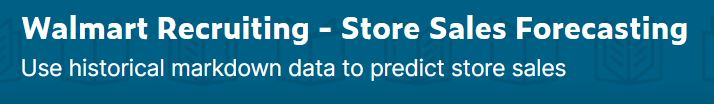

<h1><b>Description</b></h1>

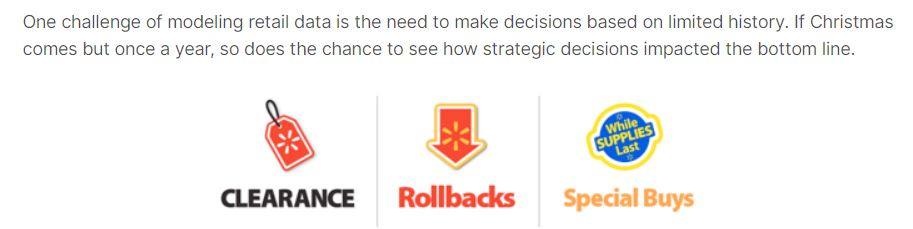

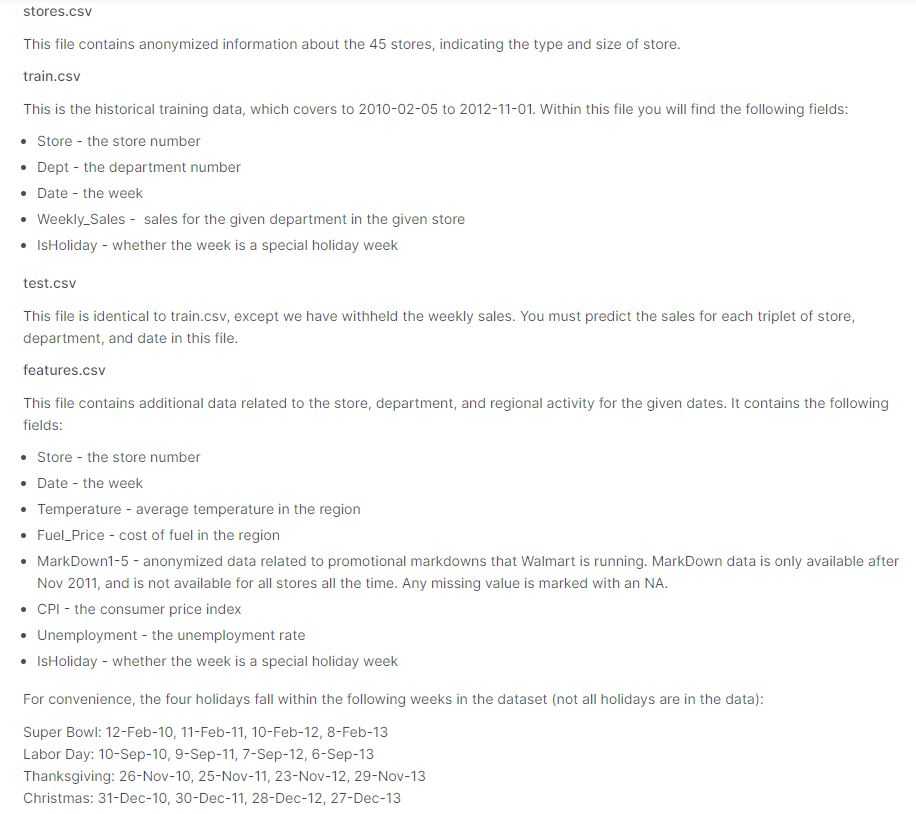

<h1><b>Real World Problem</b></h1>

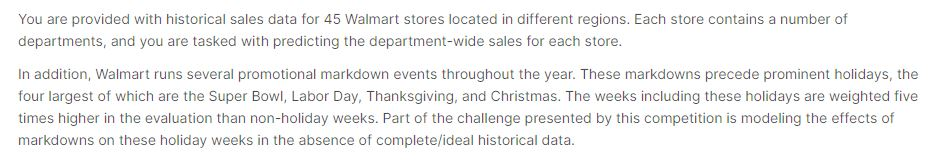

<h1><b>Useful Links</b></h1>

https://www.kaggle.com/c/walmart-recruiting-store-sales-forecasting/data

https://www.tutorialspoint.com/sales_forecasting/sales_forecasting_introduction.htm

https://www.walmart.com/

<h1><b>Business Objectives and Constraints</b></h1>

1.) Stationarity may not be well preserved.

2.) The evaluation metric is weighted mean absolute error.For holidays, the predictions are given more weightage.We need to focus relatively more on the observations which are recorded in the holidays.

3.) If we correctly model the observations, this could help Walmart in deciding upon their future budget,materials,etc. This could increase their revenue substantially.



<h1><b>Installing the requirements</b></h1>

In [ ]:
!pip install pandas
!pip install numpy
!pip install matplotlib

<h1><b>Importing the required libraries</b></h1>

In [ ]:
# Importing the necessary libraries..
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from matplotlib import pyplot as plt
from collections import Counter
import joblib
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns

<h1><b>Downloading the Dataset</b></h1>

Using curlwget extension, we have extracted the link to download the dataset from Kaggle.

Disclaimer: I don't know whether it is legal or not !!

In [ ]:
# Downloading the dataset from the Kaggle website.
!wget --header="Host: storage.googleapis.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/85.0.4183.121 Safari/537.36 Edg/85.0.564.70" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-US,en;q=0.9" --header="Referer: https://www.kaggle.com/" "https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/3816/32105/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1602507515&Signature=J%2B9Esap36xIIDR0M0dqTLteFcX1zQf5IpmV0We%2Bk0ygL0aAYERuo8kcL%2F5ZSct%2BDNkXWi3M5B21qV2vv54Sjex1NXAH7vP4FAxdPazbR32A02Rez0fKwLcdvXkjY8TxBxCOfifHt6ZwbpkS0e8gszEYdA5HdJbSWHvpYM21xnicAqCoWxz3t%2Bj87ivr4CJF7gjmrBlf%2B67ciNFi0eEMx%2BQek5XOjXN1Hai5BrKeSIZSN83Pvl%2FBxwglarT0WyDIefBm6ekm9nDLH7KaZ5TjAqV%2BwQ0cEiI%2Bqz1Lv5AjAdJaS02dnu736L8ILgjZGtf7jllBjQ3iJKWM53X4C40R%2FlA%3D%3D&response-content-disposition=attachment%3B+filename%3Dwalmart-recruiting-store-sales-forecasting.zip" -c -O 'walmart-recruiting-store-sales-forecasting.zip'

--2020-10-12 03:11:54--  https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/3816/32105/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1602507515&Signature=J%2B9Esap36xIIDR0M0dqTLteFcX1zQf5IpmV0We%2Bk0ygL0aAYERuo8kcL%2F5ZSct%2BDNkXWi3M5B21qV2vv54Sjex1NXAH7vP4FAxdPazbR32A02Rez0fKwLcdvXkjY8TxBxCOfifHt6ZwbpkS0e8gszEYdA5HdJbSWHvpYM21xnicAqCoWxz3t%2Bj87ivr4CJF7gjmrBlf%2B67ciNFi0eEMx%2BQek5XOjXN1Hai5BrKeSIZSN83Pvl%2FBxwglarT0WyDIefBm6ekm9nDLH7KaZ5TjAqV%2BwQ0cEiI%2Bqz1Lv5AjAdJaS02dnu736L8ILgjZGtf7jllBjQ3iJKWM53X4C40R%2FlA%3D%3D&response-content-disposition=attachment%3B+filename%3Dwalmart-recruiting-store-sales-forecasting.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.123.128, 173.194.215.128, 173.194.216.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.123.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2827397 (2.7M) [application/zip]
Saving to: ‘wal

<h3><b>Unzipping </b></h3>

In [ ]:
# Unzipping the files downloaded.
!unzip '/content/walmart-recruiting-store-sales-forecasting.zip'

Archive:  /content/walmart-recruiting-store-sales-forecasting.zip
  inflating: features.csv.zip        
  inflating: sampleSubmission.csv.zip  
  inflating: stores.csv              
  inflating: test.csv.zip            
  inflating: train.csv.zip           


In [ ]:
# Unzipping the files downloaded.
!unzip '/content/test.csv.zip'
!unzip '/content/train.csv.zip'
!unzip '/content/features.csv.zip'

Archive:  /content/test.csv.zip
  inflating: test.csv                
Archive:  /content/train.csv.zip
  inflating: train.csv               
Archive:  /content/features.csv.zip
  inflating: features.csv            


<b><h1>Exploratory data analysis

<h2><b>Reading the dataset</b></h2>

In [ ]:
#Reading the csv files downloaded using read_csv method from pandas
features = pd.read_csv('features.csv')
stores = pd.read_csv('stores.csv')
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')

<h2><b>Displaying the dataset</b></h2>

In [ ]:
#Displaying the features dataframe
features.head(5)

Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0      1  2010-02-05        42.31       2.572        NaN        NaN   
1      1  2010-02-12        38.51       2.548        NaN        NaN   
2      1  2010-02-19        39.93       2.514        NaN        NaN   
3      1  2010-02-26        46.63       2.561        NaN        NaN   
4      1  2010-03-05        46.50       2.625        NaN        NaN   

   MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
0        NaN        NaN        NaN  211.096358         8.106      False  
1        NaN        NaN        NaN  211.242170         8.106       True  
2        NaN        NaN        NaN  211.289143         8.106      False  
3        NaN        NaN        NaN  211.319643         8.106      False  
4        NaN        NaN        NaN  211.350143         8.106      False

In [ ]:
#Displaying the dates where the observations are recorded.
#unique function from the numpy library returns the unique values of the array.
print(np.unique(train['Date']))

['2010-02-05' '2010-02-12' '2010-02-19' '2010-02-26' '2010-03-05'
 '2010-03-12' '2010-03-19' '2010-03-26' '2010-04-02' '2010-04-09'
 '2010-04-16' '2010-04-23' '2010-04-30' '2010-05-07' '2010-05-14'
 '2010-05-21' '2010-05-28' '2010-06-04' '2010-06-11' '2010-06-18'
 '2010-06-25' '2010-07-02' '2010-07-09' '2010-07-16' '2010-07-23'
 '2010-07-30' '2010-08-06' '2010-08-13' '2010-08-20' '2010-08-27'
 '2010-09-03' '2010-09-10' '2010-09-17' '2010-09-24' '2010-10-01'
 '2010-10-08' '2010-10-15' '2010-10-22' '2010-10-29' '2010-11-05'
 '2010-11-12' '2010-11-19' '2010-11-26' '2010-12-03' '2010-12-10'
 '2010-12-17' '2010-12-24' '2010-12-31' '2011-01-07' '2011-01-14'
 '2011-01-21' '2011-01-28' '2011-02-04' '2011-02-11' '2011-02-18'
 '2011-02-25' '2011-03-04' '2011-03-11' '2011-03-18' '2011-03-25'
 '2011-04-01' '2011-04-08' '2011-04-15' '2011-04-22' '2011-04-29'
 '2011-05-06' '2011-05-13' '2011-05-20' '2011-05-27' '2011-06-03'
 '2011-06-10' '2011-06-17' '2011-06-24' '2011-07-01' '2011-07-08'
 '2011-07-

In [ ]:
#Displaying the stores dataframe.
stores.head(5)

Store Type    Size
0      1    A  151315
1      2    A  202307
2      3    B   37392
3      4    A  205863
4      5    B   34875

In [ ]:
#Displaying the train dataframe.
train.head(5)

Store  Dept        Date  Weekly_Sales  IsHoliday
0      1     1  2010-02-05      24924.50      False
1      1     1  2010-02-12      46039.49       True
2      1     1  2010-02-19      41595.55      False
3      1     1  2010-02-26      19403.54      False
4      1     1  2010-03-05      21827.90      False

In [ ]:
#Displaying the test dataframe.
test.head(5)

Store  Dept        Date  IsHoliday
0      1     1  2012-11-02      False
1      1     1  2012-11-09      False
2      1     1  2012-11-16      False
3      1     1  2012-11-23       True
4      1     1  2012-11-30      False

<h2><b>Features DataFrame</b></h2>

In [ ]:
#Displaying the features dataframe.
features.head(5)

Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0      1  2010-02-05        42.31       2.572        NaN        NaN   
1      1  2010-02-12        38.51       2.548        NaN        NaN   
2      1  2010-02-19        39.93       2.514        NaN        NaN   
3      1  2010-02-26        46.63       2.561        NaN        NaN   
4      1  2010-03-05        46.50       2.625        NaN        NaN   

   MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
0        NaN        NaN        NaN  211.096358         8.106      False  
1        NaN        NaN        NaN  211.242170         8.106       True  
2        NaN        NaN        NaN  211.289143         8.106      False  
3        NaN        NaN        NaN  211.319643         8.106      False  
4        NaN        NaN        NaN  211.350143         8.106      False

In [ ]:
#Converting the Date attribute in features dataframe to datetime type.
features['Date'] = pd.to_datetime(features['Date'])

In [ ]:
#Calculating the percentage of missing values in the MarkDown attribute
total = len(features)
for i in range(1,6):
    nan = features['MarkDown{0}'.format(i)].isna().sum()
    print("Percentage of missing values in MarkDown{0} column is ".format(i),((nan/total)*100),"%")

Percentage of missing values in MarkDown1 column is  50.76923076923077 %
Percentage of missing values in MarkDown2 column is  64.33455433455434 %
Percentage of missing values in MarkDown3 column is  55.885225885225886 %
Percentage of missing values in MarkDown4 column is  57.7045177045177 %
Percentage of missing values in MarkDown5 column is  50.54945054945055 %


In [ ]:
#We are filling the markdown(*) attribute with 0 .
features[['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']]=features[['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']].fillna(0)

In [ ]:
#Printing the total number of observations.
print("Total number of observations ",len(features))

Total number of observations  8190


In [ ]:
#Describing the attributes present in the features dataframe.
features.describe()

Store  Temperature   Fuel_Price      MarkDown1      MarkDown2  \
count  8190.000000  8190.000000  8190.000000    8190.000000    8190.000000   
mean     23.000000    59.356198     3.405992    3462.090725    1206.981664   
std      12.987966    18.678607     0.431337    7388.916286    5495.556015   
min       1.000000    -7.290000     2.472000   -2781.450000    -265.760000   
25%      12.000000    45.902500     3.041000       0.000000       0.000000   
50%      23.000000    60.710000     3.513000       0.000000       0.000000   
75%      34.000000    73.880000     3.743000    4639.585000      98.590000   
max      45.000000   101.950000     4.468000  103184.980000  104519.540000   

           MarkDown3     MarkDown4      MarkDown5          CPI  Unemployment  
count    8190.000000   8190.000000    8190.000000  7605.000000   7605.000000  
mean      776.464219   1392.763115    2043.403725   172.460809      7.826821  
std      7539.953758   4707.111488    9431.223215    39.738346      1.877259  
min      -179.260000      0.000000    -185.170000   126.064000      3.684000  
25%         0.000000      0.000000       0.000000   132.364839      6.634000  
50%         0.000000      0.000000       0.000000   182.764003      7.806000  
75%        24.220000    774.692500    2680.295000   213.932412      8.567000  
max    149483.310000  67474.850000  771448.100000   228.976456     14.313000

We have more NaN values in the MarkDown attributes

The mean temperature is 59.35 Celsius

The maximum average price difference is 228 percent more then the previous observations.This record is useful, since it directly affects the market.

The minimum average price difference is 126 percent more than the previous observations.

The unemployment rate is quite low.

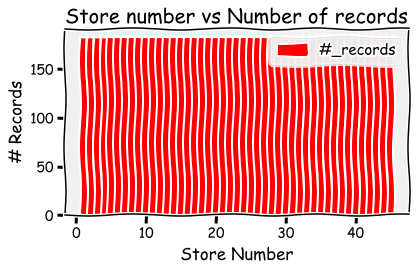

In [ ]:
#For each type of stores , we are counting the number of records
#Creating a counter object on store attribute.
features_store = Counter(features['Store'].values)

#Matplotlib style(comics)
plt.xkcd()

#Storing the values of the type of stores in x
x = list(features_store.keys())
#Storing the values of the counts of each type of stores in y
y = list(features_store.values())



#Plotting the barplot with x and y
plt.bar(x,y,label='#_records',color='r')

#For displaying purpose
plt.legend(prop={'size':15})
plt.xlabel('Store Number')
plt.ylabel('# Records')
plt.title('Store number vs Number of records')

#Displaying the plot
plt.tight_layout()
plt.show()

We have a total of 182 observations for each store.

The observations were taken from 2010-02-05 to 2013-07-26.

In [ ]:
#Routine to plot the barplot
x = np.arange(1,46,1)
def barplot(y,ylabel,title,color):
    #Label for the abscissa
    xlabel='Store Number'
    #Style(Comic)
    plt.xkcd()
    
    #Barplot definition
    plt.bar(x,y,label=ylabel,color=color)

    #Setting the font size for the label
    plt.legend(prop={'size':15})
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

    #For size adjustments
    plt.tight_layout()
    #Displaying the actual plot
    plt.show()

In [ ]:
#Routine to display a normal plot
def plots(attribute,ylabel):
    xlabel = 'Week in units'
    title = 'Week vs '+ylabel
    plt.plot(attribute)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

In [ ]:
#Routine to display a histogram based on the attribute passes.
def histogram(attribute,xlabel,ylabel,title,color):
    #hist function is used to plot the histogram by specifying the bins.
    plt.hist(attribute,color=color)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

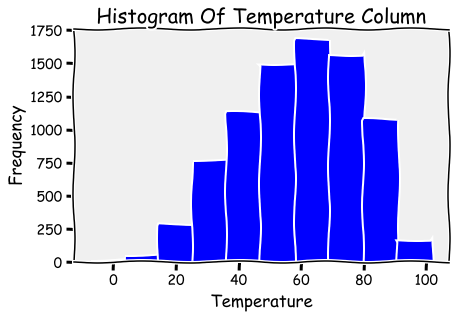

In [ ]:
histogram(features['Temperature'],'Temperature','Frequency','Histogram Of Temperature Column','b')

Loosely, it follows a gaussian distribution.

The average temperature is around 60 Celsius

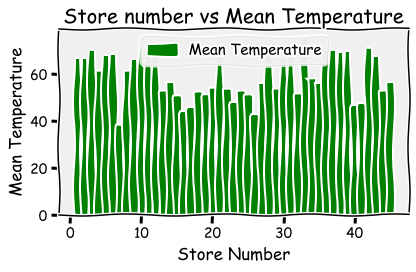

In [ ]:
y = features.groupby(by='Store')['Temperature'].mean().values
barplot(y,'Mean Temperature','Store number vs Mean Temperature','g')

On average , all type of stores have their mean temperature greater than 40 Celsius.

Only few stores have more than 80 Celsius as their mean temperature.

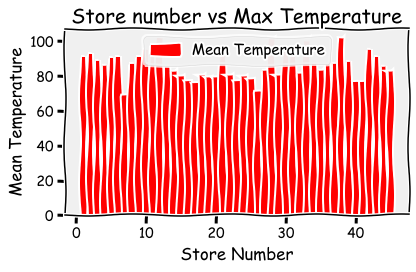

In [ ]:
y = features.groupby(by='Store')['Temperature'].max().values
barplot(y,'Mean Temperature','Store number vs Max Temperature','r')

The maximum temperature was recorded in the store #12.This may affect the sales.Some people prefer to go for shopping by deciding upon the temperature.

The minimum threshold is around 60 degrees.It is quite closer to the mean temperature.

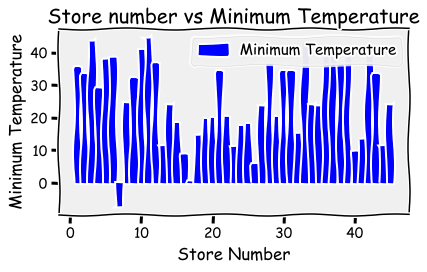

In [ ]:
y = features.groupby(by='Store')['Temperature'].min().values
barplot(y,'Minimum Temperature','Store number vs Minimum Temperature','b')

The global minimum temperature across all the stores is lesser than -6 Celsius.

But, most of the stores has their minimum temperature recorded above 0 Celsius.

It may be wrongly imputed.

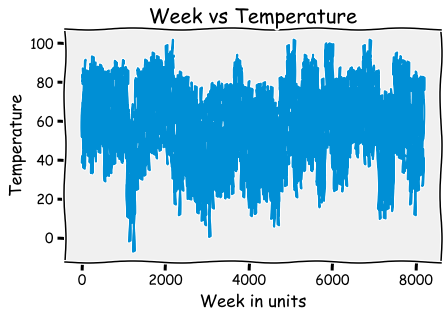

In [ ]:
plots(features['Temperature'],'Temperature')

The variations is not stationery .

The values of the temperature forms a cluster for every certain period of weeks .

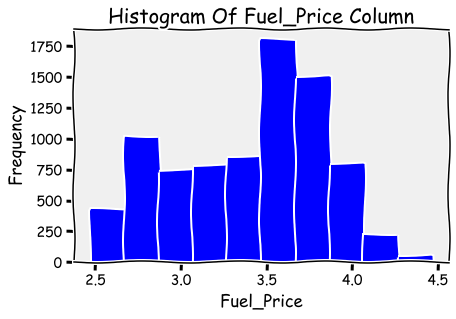

In [ ]:
histogram(features['Fuel_Price'],'Fuel_Price','Frequency','Histogram Of Fuel_Price Column','b')

Most of the values are between 3.5 and 3.9



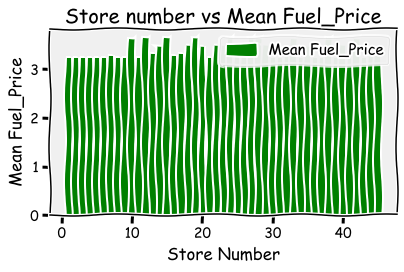

In [ ]:
y = features.groupby(by='Store')['Fuel_Price'].mean().values
barplot(y,'Mean Fuel_Price','Store number vs Mean Fuel_Price','g')

On average, the fuel price recorded is around 3 for all regions where stores are located.

This may not discriminate among different stores.

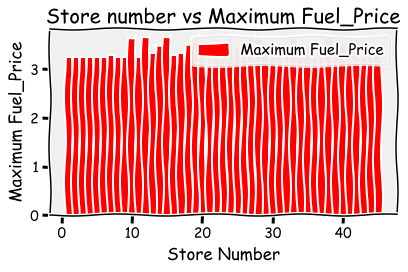

In [ ]:
y = features.groupby(by='Store')['Fuel_Price'].mean().values
barplot(y,'Maximum Fuel_Price','Store number vs Maximum Fuel_Price','r')

The maximum and mean value appears to be same.

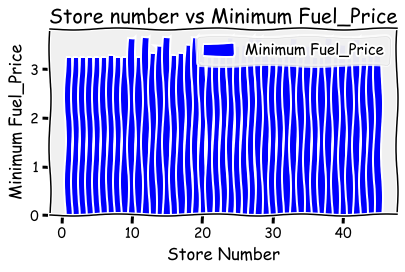

In [ ]:
y = features.groupby(by='Store')['Fuel_Price'].mean().values
barplot(y,'Minimum Fuel_Price','Store number vs Minimum Fuel_Price','b')

The minimum and mean value appears to be same.

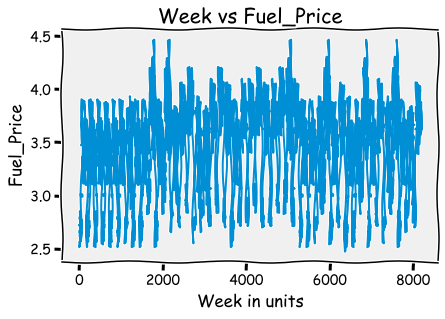

In [ ]:
plots(features['Fuel_Price'],'Fuel_Price')

The prices of the fuel as time varies

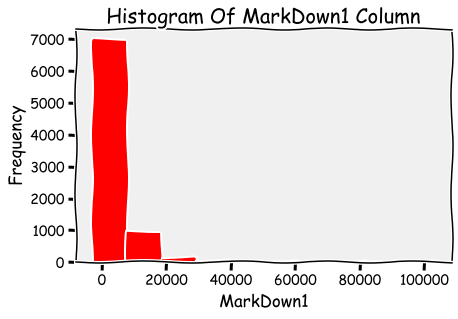

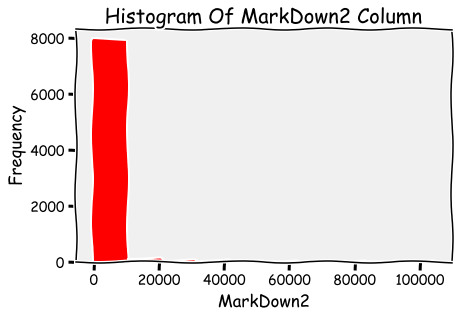

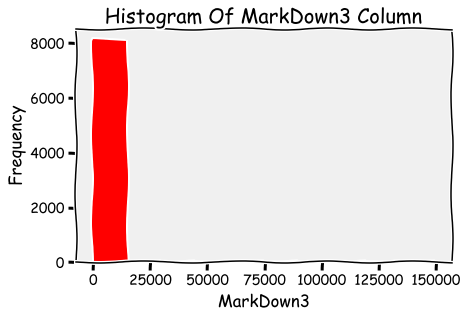

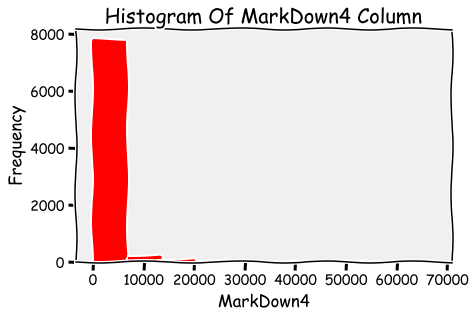

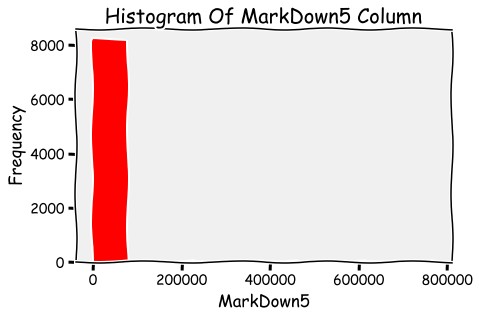

In [ ]:
for i in range(1,6):
    histogram(features['MarkDown{0}'.format(i)],'MarkDown{0}'.format(i),'Frequency','Histogram Of MarkDown{0} Column'.format(i),'r')

Since markdown events occur twice or thrice in a year, more number of NaN values are present.

The available quantities are lesser than 40K.

Loosely, all the attributes have same distribution.

It is highly skewed.

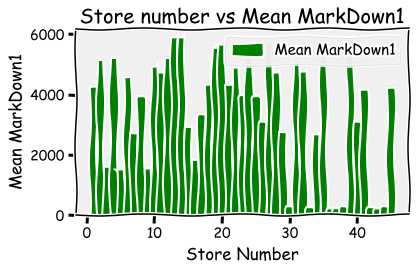

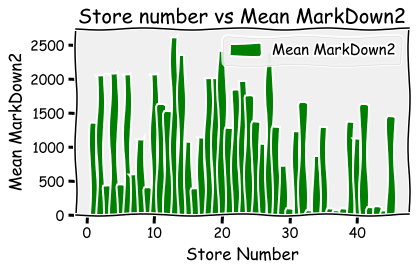

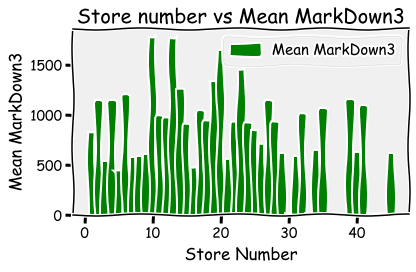

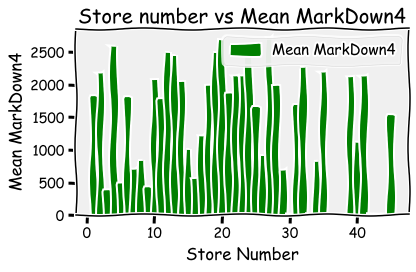

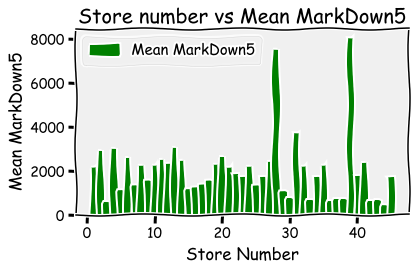

In [ ]:
for i in range(1,6):
    y = features.groupby(by='Store')['MarkDown{0}'.format(i)].mean().values
    barplot(y,'Mean MarkDown{0}'.format(i),'Store number vs Mean MarkDown{0}'.format(i),'g')

For MarkDown5, the quantities available is less across all stores.

For some stores,the quantity available for all the markdown events is very low.
This feature discriminates the store attribute.

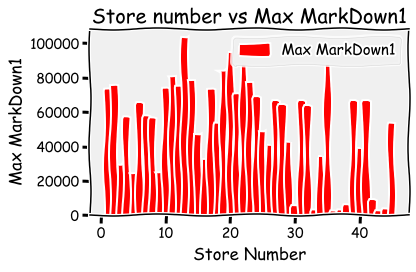

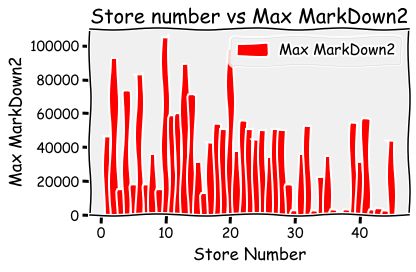

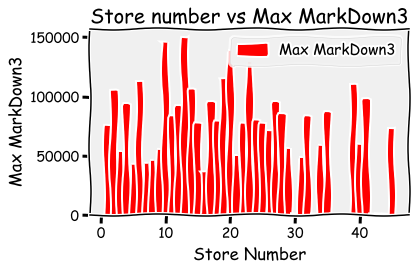

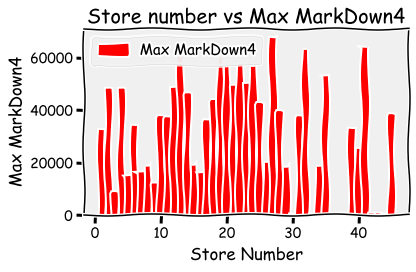

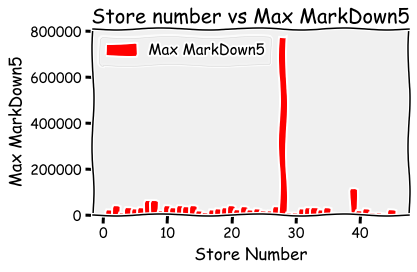

In [ ]:
for i in range(1,6):
    y = features.groupby(by='Store')['MarkDown{0}'.format(i)].max().values
    barplot(y,'Max MarkDown{0}'.format(i),'Store number vs Max MarkDown{0}'.format(i),'r')

For the MarkDown5 event, the quantity available in the stores are very low relatively to other events.

In this event , the sales would be very less . 

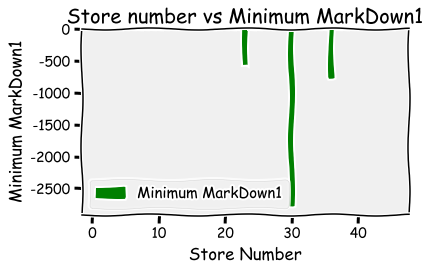

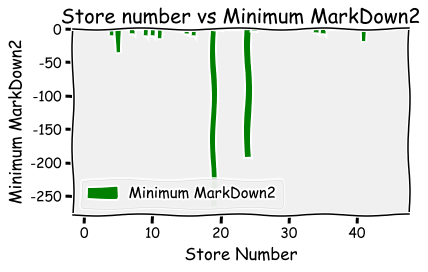

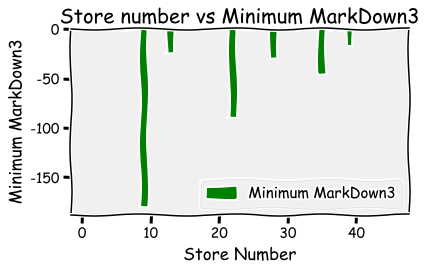

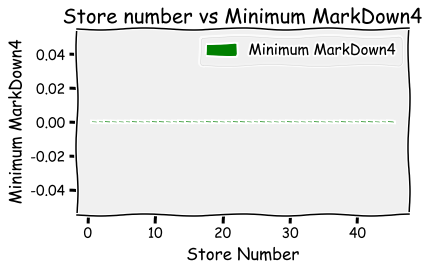

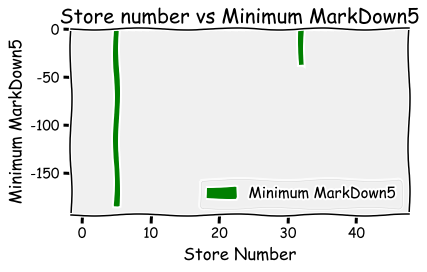

In [ ]:
for i in range(1,6):
    y = features.groupby(by='Store')['MarkDown{0}'.format(i)].min().values
    barplot(y,'Minimum MarkDown{0}'.format(i),'Store number vs Minimum MarkDown{0}'.format(i),'g')

There are some negative values recorded in this attribute.We should remove this,since quantity cannot be negative.

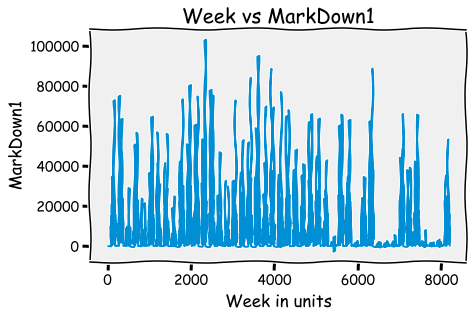

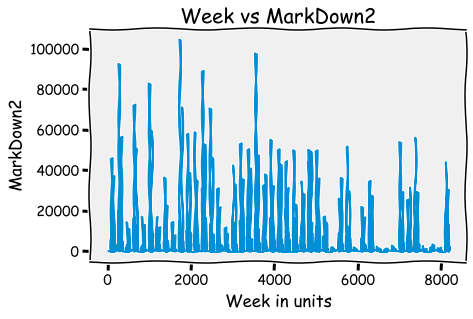

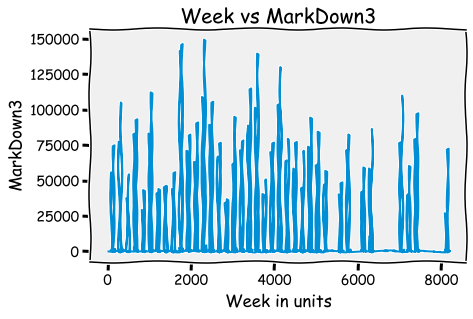

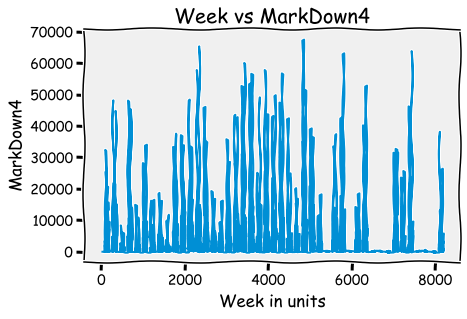

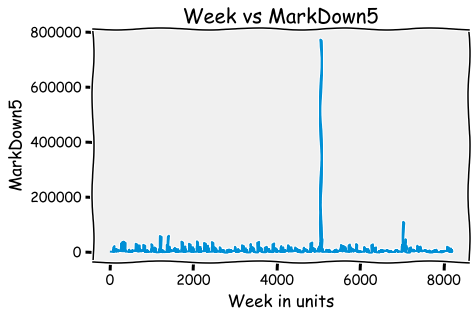

In [ ]:
for i in range(1,6):
    plots(features['MarkDown{0}'.format(i)],'MarkDown{0}'.format(i))

The similar behavior for MarkDown5 event is shown.

In [ ]:
#Counting the number of observations with NaN values
features['CPI'].isna().sum()

585

In [ ]:
#Filling the missing values with the respective means of the attributes.
features['CPI']=features['CPI'].fillna(features['CPI'].mean())

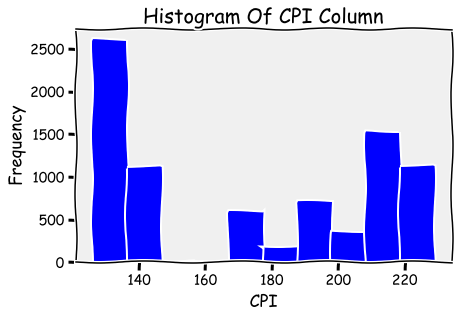

In [ ]:
#Plotting the histogram of CPI column
histogram(features['CPI'],'CPI','Frequency','Histogram Of CPI Column','b')

The plot shows that, the price didn't decrease over a period of time substantially.

The maximum average difference was recorded above 220

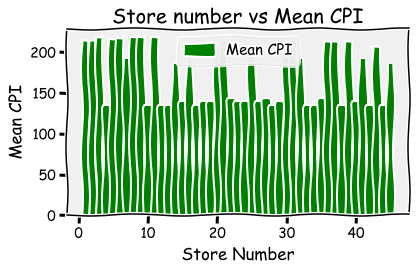

In [ ]:
y = features.groupby(by='Store')['CPI'].mean().values
barplot(y,'Mean CPI','Store number vs Mean CPI','g')

All the stores recorded an mean CPI above 100. This shows that the price for the goods has not been decreased over a period of time.

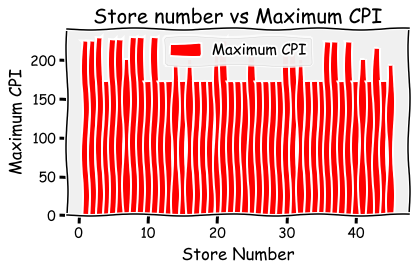

In [ ]:
y = features.groupby(by='Store')['CPI'].max().values
barplot(y,'Maximum CPI','Store number vs Maximum CPI','r')

Some stores has their maximum CPI above 200.

In this stores, the sales may be dropped due to high prices.

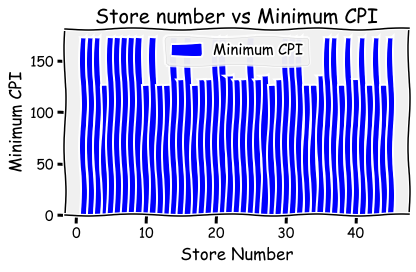

In [ ]:
y = features.groupby(by='Store')['CPI'].min().values
barplot(y,'Minimum CPI','Store number vs Minimum CPI','b')

The minimum is above the mean value.

This is a good feature to comment about the sales.

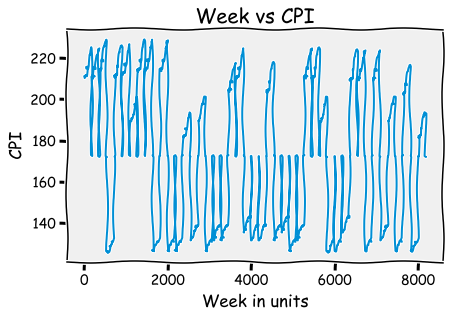

In [ ]:
plots(features['CPI'],'CPI')

The CPI increases and decreases for a period of time. 

But it doesn't reach below 100.This shows that the price always increases.

In [ ]:
#Filling the observations which as NaN values with the respective mean
features['Unemployment']=features['Unemployment'].fillna(features['Unemployment'].mean())

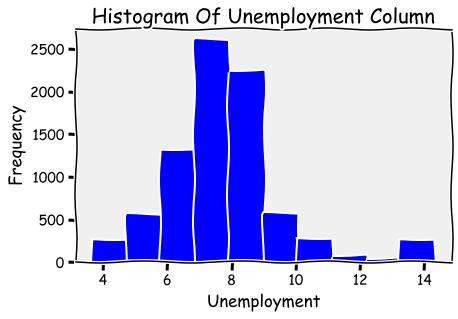

In [ ]:
histogram(features['Unemployment'],'Unemployment','Frequency','Histogram Of Unemployment Column','b')

The unemployment rates are quite low.Most of them are employed.

This may affect the sales.Generally(without any bias),working persons tend to buy more products.

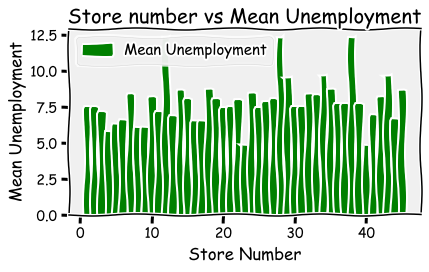

In [ ]:
y = features.groupby(by='Store')['Unemployment'].mean().values
barplot(y,'Mean Unemployment','Store number vs Mean Unemployment','g')

For certain stores,the unemployment rate is quite high relatively to other stores.The sales for these stores maybe less compared to other stores.

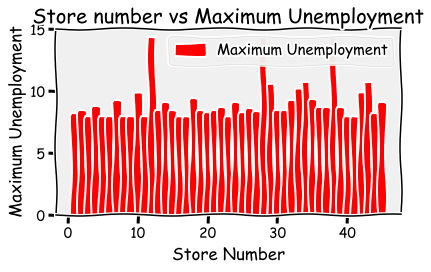

In [ ]:
y = features.groupby(by='Store')['Unemployment'].max().values
barplot(y,'Maximum Unemployment','Store number vs Maximum Unemployment','r')

7.5 % of the stores have around 15 percent unemployment rate in the region where it is located.It is quite high relative to the mean.

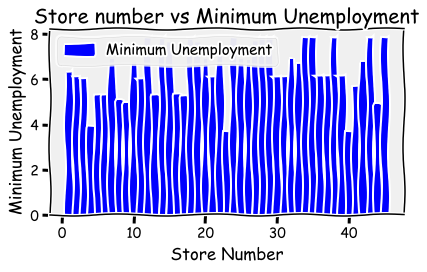

In [ ]:
y = features.groupby(by='Store')['Unemployment'].min().values
barplot(y,'Minimum Unemployment','Store number vs Minimum Unemployment','b')

Atleast 3 % of the people in a region are unemployed.

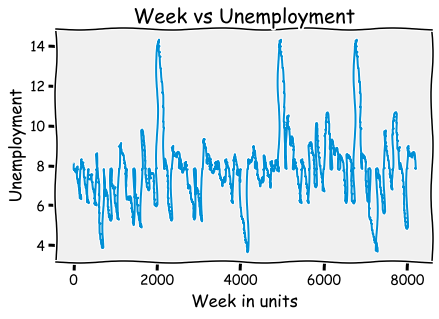

In [ ]:
plots(features['Unemployment'],'Unemployment')

<h1><b>Stores DataFrame</b></h1>

In [ ]:
#Displaying the stores dataframe
stores.head(10)

Store Type    Size
0      1    A  151315
1      2    A  202307
2      3    B   37392
3      4    A  205863
4      5    B   34875
5      6    A  202505
6      7    B   70713
7      8    A  155078
8      9    B  125833
9     10    B  126512

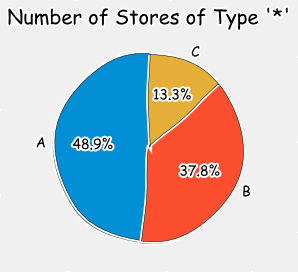

In [ ]:
#For each stores,we are counting the number of records present for it.
stores_count = stores.groupby('Type')['Store'].count()


#Using a pie chart,we are displaying the relative percentage of the observations for each type of stores.
plt.style.use("fivethirtyeight")
slices=stores_count.values
colors=['orange','white','green']
labels=['A','B','C']
plt.pie(slices,labels=labels,wedgeprops={'edgecolor':'black'},shadow=True,startangle=90,autopct='%1.1f%%')
plt.title("Number of Stores of Type '*'")
plt.tight_layout()
plt.show()

Stores of type C are lesser compared to other types.

Later, we can analyze the sales in these types.

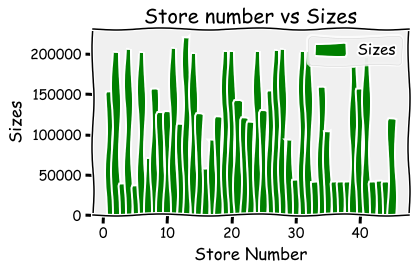

In [ ]:
#It's a bar plot between store number and it's sizes.
y=stores.Size
barplot(y,'Sizes','Store number vs Sizes','g')

Size play an important role in sales. Most of the stores has their sizes above the average size.

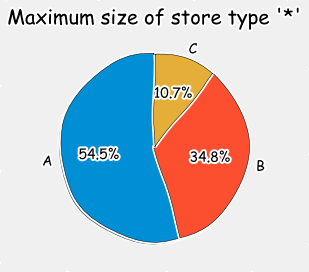

In [ ]:
#For each type of stores , we are extracting the minimum size value.
stores_count = stores.groupby('Type')['Size'].max()

plt.style.use("fivethirtyeight")
slices=stores_count.values
colors=['orange','white','green']
labels=['A','B','C']
plt.pie(slices,labels=labels,wedgeprops={'edgecolor':'black'},shadow=True,startangle=90,autopct='%1.1f%%')
plt.title("Maximum size of store type '*'")
plt.tight_layout()
plt.show()

The size of the type C is very low compared to other types. The sales in the type C store may be less compared to other types.

The sales in the type A store may be relatively high.

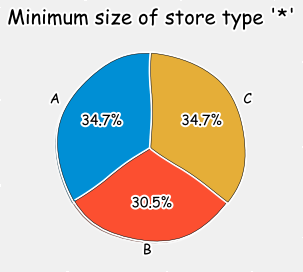

In [ ]:
#For each type of stores , we are extracting the minimum size value.
stores_count = stores.groupby('Type')['Size'].min()

plt.style.use("fivethirtyeight")
slices=stores_count.values
colors=['orange','white','green']
labels=['A','B','C']
plt.pie(slices,labels=labels,wedgeprops={'edgecolor':'black'},shadow=True,startangle=90,autopct='%1.1f%%')
plt.title("Minimum size of store type '*'")
plt.tight_layout()
plt.show()

Here , the type A and C looks similar.

<h1><b>Combining the DataFrame(s)</b></h1>

In [ ]:
#Converting the date attribute to pandas datetime object.
train['Date'] = pd.to_datetime(train['Date'])

In [ ]:
#Printing the train dataframe
train

Store  Dept       Date  Weekly_Sales  IsHoliday
0           1     1 2010-02-05      24924.50      False
1           1     1 2010-02-12      46039.49       True
2           1     1 2010-02-19      41595.55      False
3           1     1 2010-02-26      19403.54      False
4           1     1 2010-03-05      21827.90      False
...       ...   ...        ...           ...        ...
421565     45    98 2012-09-28        508.37      False
421566     45    98 2012-10-05        628.10      False
421567     45    98 2012-10-12       1061.02      False
421568     45    98 2012-10-19        760.01      False
421569     45    98 2012-10-26       1076.80      False

[421570 rows x 5 columns]

In [ ]:
#Merging the features and the train dataframe on Store,Date and IsHoliday attributes.
data=pd.merge(train,features,how='inner',on=['Store','Date','IsHoliday'])

In [ ]:
#Merging the dataframe with the stores dataframe on the Store attribute
walmart_df=pd.merge(data,stores,how='inner',on=['Store'])

In [ ]:
#Displaying the walmart_df dataframe
walmart_df.head(5)

Store  Dept       Date  Weekly_Sales  IsHoliday  Temperature  Fuel_Price  \
0      1     1 2010-02-05      24924.50      False        42.31       2.572   
1      1     2 2010-02-05      50605.27      False        42.31       2.572   
2      1     3 2010-02-05      13740.12      False        42.31       2.572   
3      1     4 2010-02-05      39954.04      False        42.31       2.572   
4      1     5 2010-02-05      32229.38      False        42.31       2.572   

   MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5         CPI  \
0        0.0        0.0        0.0        0.0        0.0  211.096358   
1        0.0        0.0        0.0        0.0        0.0  211.096358   
2        0.0        0.0        0.0        0.0        0.0  211.096358   
3        0.0        0.0        0.0        0.0        0.0  211.096358   
4        0.0        0.0        0.0        0.0        0.0  211.096358   

   Unemployment Type    Size  
0         8.106    A  151315  
1         8.106    A  151315  
2         8.106    A  151315  
3         8.106    A  151315  
4         8.106    A  151315

In [ ]:
#Printing the total number of data points
print("Total number of data points ",len(walmart_df))

Total number of data points  421570


In [ ]:
#We are splitting the date attribute into several entities which are stored in the attributes list.
attributes = ['day','month','year','week','is_month_end','is_month_start','is_year_start','is_year_end']
for i in attributes:
    #Extracting the features in the attributes list from the Date attribute.
    walmart_df[i]=list(map(lambda x:getattr(x,i),walmart_df['Date']))

In [ ]:
#Displaying the walmart_df dataframe
walmart_df.head(5)

Store  Dept       Date  Weekly_Sales  IsHoliday  Temperature  Fuel_Price  \
0      1     1 2010-02-05      24924.50      False        42.31       2.572   
1      1     2 2010-02-05      50605.27      False        42.31       2.572   
2      1     3 2010-02-05      13740.12      False        42.31       2.572   
3      1     4 2010-02-05      39954.04      False        42.31       2.572   
4      1     5 2010-02-05      32229.38      False        42.31       2.572   

   MarkDown1  MarkDown2  MarkDown3  ...  Type    Size  day  month  year  week  \
0        0.0        0.0        0.0  ...     A  151315    5      2  2010     5   
1        0.0        0.0        0.0  ...     A  151315    5      2  2010     5   
2        0.0        0.0        0.0  ...     A  151315    5      2  2010     5   
3        0.0        0.0        0.0  ...     A  151315    5      2  2010     5   
4        0.0        0.0        0.0  ...     A  151315    5      2  2010     5   

   is_month_end  is_month_start  is_year_start  is_year_end  
0         False           False          False        False  
1         False           False          False        False  
2         False           False          False        False  
3         False           False          False        False  
4         False           False          False        False  

[5 rows x 24 columns]

We already observed some negative values in the Weekly_Sales attribute. We will safely remove those records.

In [ ]:
#Counting the number of records with negative values in the Weekly_Sales attribute
count = (walmart_df['Weekly_Sales']<0).sum()
#Finding the proportion
proportion = count/len(walmart_df)
#Printing the percentage of records with negative values in the Weekly_Sales attribute
print("Percentage of records with negative values in the Weekly_Sales attribute ",proportion*100)
#Selecting the records with valid values in the Weekly_Sales attribute
walmart_df = walmart_df[walmart_df['Weekly_Sales']>=0]

Percentage of records with negative values in the Weekly_Sales attribute  0.30481296107408024


In [ ]:
#Printing the length of the dataframe
print("Length of the dataframe after removing the negative values in the Weekly_Sales attribute ",len(walmart_df))

Length of the dataframe after removing the negative values in the Weekly_Sales attribute  420285


We already observed some negative values in the MarkDown(*) attributes. We will safely remove those records.

In [ ]:
#Creating a list to store the names of the attributes for which we need to perform analysis
attributes = ['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']
for i in attributes:
    #Counting the number of records with negative values in it.
    count = (getattr(walmart_df,i)<0).sum()
    #Finding the proportion
    proportion = count/len(walmart_df)
    #Printing the percentage of records with negative values in it.
    print("Percentage of records with negative values in the {0} attribute ".format(i),proportion*100)

Percentage of records with negative values in the MarkDown1 attribute  0.0
Percentage of records with negative values in the MarkDown2 attribute  0.3097897855026946
Percentage of records with negative values in the MarkDown3 attribute  0.06091104845521491
Percentage of records with negative values in the MarkDown4 attribute  0.0
Percentage of records with negative values in the MarkDown5 attribute  0.0


In [ ]:
#Selecting the records with valid values in the MarkDown(*) attributes
walmart_df = walmart_df[walmart_df.MarkDown2>=0]
walmart_df = walmart_df[walmart_df.MarkDown3>=0]

In [ ]:
#Printing the length of the dataframe
print("Length of the dataframe after removing the negative values in the MarkDown(*) attributes ",len(walmart_df))

Length of the dataframe after removing the negative values in the MarkDown(*) attributes  418727


In [ ]:
#We are sorting the recors based on the Date attribute.It is useful when splitting the dataset for training and testing purpose.
walmart_df.sort_values(by='Date',inplace=True,ignore_index=True)

In [ ]:
#Displaying the walmart_df dataframe.
walmart_df.head(5)

Store  Dept       Date  Weekly_Sales  IsHoliday  Temperature  Fuel_Price  \
0      1     1 2010-02-05      24924.50      False        42.31       2.572   
1     35     3 2010-02-05      14612.19      False        27.19       2.784   
2     35     4 2010-02-05      26323.15      False        27.19       2.784   
3     35     5 2010-02-05      36414.63      False        27.19       2.784   
4     35     6 2010-02-05      11437.81      False        27.19       2.784   

   MarkDown1  MarkDown2  MarkDown3  ...  Type    Size  day  month  year  week  \
0        0.0        0.0        0.0  ...     A  151315    5      2  2010     5   
1        0.0        0.0        0.0  ...     B  103681    5      2  2010     5   
2        0.0        0.0        0.0  ...     B  103681    5      2  2010     5   
3        0.0        0.0        0.0  ...     B  103681    5      2  2010     5   
4        0.0        0.0        0.0  ...     B  103681    5      2  2010     5   

   is_month_end  is_month_start  is_year_start  is_year_end  
0         False           False          False        False  
1         False           False          False        False  
2         False           False          False        False  
3         False           False          False        False  
4         False           False          False        False  

[5 rows x 24 columns]

In [ ]:
#Routine to plot the barchart.
def barplot(x,y,xlabel,ylabel,title,color):
    plt.xkcd()
    width=0.25

    plt.bar(x,y,label=ylabel,color=color,width=width)

    plt.legend(prop={'size':15})
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

    plt.tight_layout()
    plt.show()

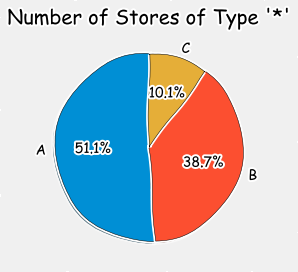

In [ ]:
#Counting the number of stores of particular type.
stores_count = walmart_df.groupby('Type')['Store'].count()

plt.style.use("fivethirtyeight")
slices=stores_count.values
colors=['orange','white','green']
labels=['A','B','C']
plt.pie(slices,labels=labels,wedgeprops={'edgecolor':'black'},shadow=True,startangle=90,autopct='%1.1f%%')
plt.title("Number of Stores of Type '*'")
plt.tight_layout()
plt.show()

Type A store dominates all other type (*) stores.

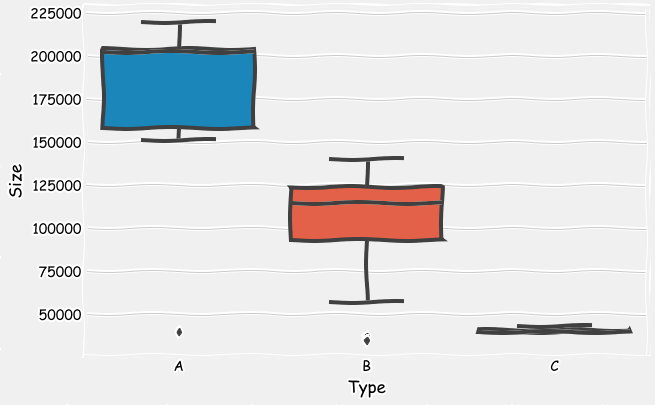

In [ ]:
#Plotting the boxplot for sizes in Type attribute
walmart_store_type = pd.concat([walmart_df['Type'], walmart_df['Size']], axis=1)
f, ax = plt.subplots(figsize=(9, 6))
fig = sns.boxplot(x='Type', y='Size', data=walmart_store_type)

In the plots given below,we will see that Type A ha more sales.Since for Type A stores, the sizes are larger therefore the size attribute also affects the weekly_sales.

The size attribute also discriminates well among all other types.

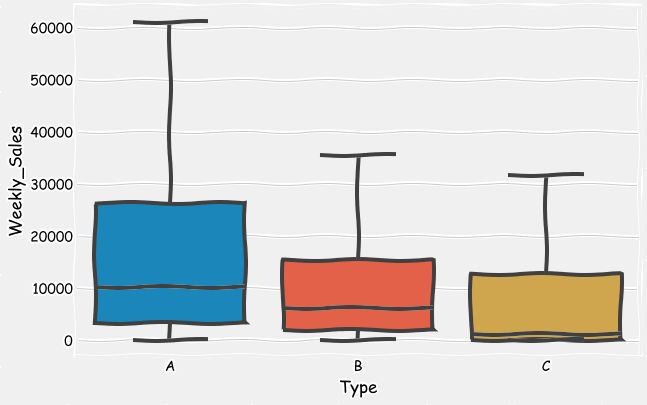

In [ ]:
#Plotting the boxplot for weekly_sales in Type attribute
walmart_sale = pd.concat([walmart_df['Type'], walmart_df['Weekly_Sales']], axis=1)
f, ax = plt.subplots(figsize=(9, 6))
fig = sns.boxplot(x='Type', y='Weekly_Sales', data=walmart_sale, showfliers=False)

The weekly_sales is very low for Type C relative to other type.This feature quite discriminates among other features.This feature denotes the range of values the weekly_sales takes.

The store of type A has more sales than any other type.

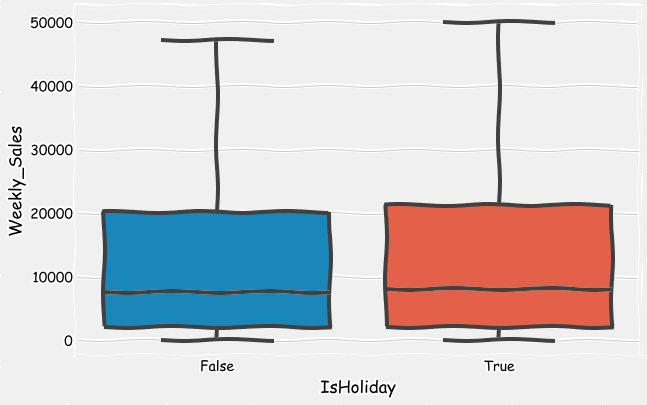

In [ ]:
#Plotting the boxplot for weekly_sales in IsHoliday attribute
walmart_sale = pd.concat([walmart_df['IsHoliday'], walmart_df['Weekly_Sales']], axis=1)
f, ax = plt.subplots(figsize=(9, 6))
fig = sns.boxplot(x='IsHoliday', y='Weekly_Sales', data=walmart_sale, showfliers=False)

In [ ]:
#This routine calculates the length of the longest subarray with inreasing values.
def maximum_length_increasing_subarray(array):
    #Initializing the length variable with 1.(Assumption:Atleast an array contains a single element in it.)
    length = 1
    #Initialzing the starting position(If the array contains a single element,then start=0)
    start=0
    #Initializing the  m variable. m-> It keeps track of the length.The value 1 denotes, atleast it has seen a single element.
    m = 1
    #For each element in the array
    for i in range(len(array)-2,-1,-1):
        #It denotes the condition for increasing.
        if array[i]<array[i+1]:
            m = m + 1
            #Updating the maximum_length so far.
            if length<m:
                length=m
                start=i
        else:
            m=1
    #Returning the length and starting position.
    return length,start

In [ ]:
#Calling the method maximum_length_increasing_subarray
length,start=maximum_length_increasing_subarray(walmart_df['Temperature'])

In [ ]:
#Printing the starting position and the length of the longest increasing subarray
print("Starting position of the maximum increasing subarray ",start)
print("Length of the maximum increasing subarray ",length)

Starting position of the maximum increasing subarray  414018
Length of the maximum increasing subarray  4


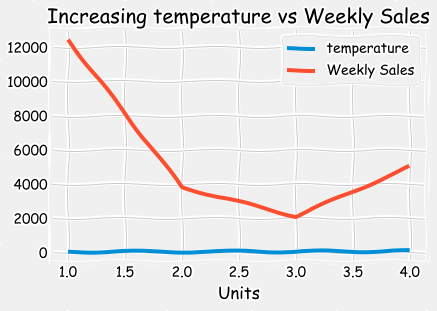

In [ ]:
#8 is the length of the longest increasing subarray.
x = np.arange(1,5,1)
#Getting the temperature values
temp = walmart_df['Temperature'][start:start+length]
#Getting the sales values
sales = walmart_df['Weekly_Sales'][start:start+length]


#Plotting the temperature and the weekly sales simultaneously.
plt.plot(x,temp,label='temperature')
plt.plot(x,sales,label='Weekly Sales')
plt.xlabel('Units')
plt.title('Increasing temperature vs Weekly Sales')
plt.legend()
plt.plot()
plt.show()

In [ ]:
#This routine calculates the length of the longest subarray with decreasing values.
def maximum_length_decreasing_subarray(array):
    #Initializing the length variable with 1.(Assumption:Atleast an array contains a single element in it.)
    length = 1
    #Initialzing the starting position(If the array contains a single element,then start=0)
    start=0
    #Initializing the  m variable. m-> It keeps track of the length.The value 1 denotes, atleast it has seen a single element.
    m = 1
    #For each element in the array
    for i in range(len(array)-2,-1,-1):
        #It denotes the condition for decreasing.
        if array[i]>array[i+1]:
            m = m + 1
            #Updating the maximum_length so far.
            if length<m:
                length=m
                start=i
        else:
            m=1
    #Returning the length and starting position.
    return length,start

In [ ]:
#Calling the method maximum_length_decreasing_subarray
length,start=maximum_length_decreasing_subarray(walmart_df['Temperature'])

In [ ]:
#Printing the starting position and the length of the longest decreasing subarray.
print("Starting position of the maximum decreasing subarray ",start)
print("Length of the maximum decreasing subarray ",length)

Starting position of the maximum decreasing subarray  251258
Length of the maximum decreasing subarray  5


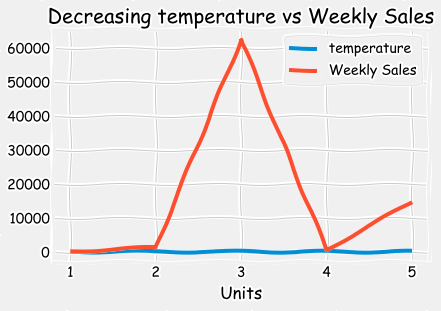

In [ ]:
#8 is the length of the longest decreasing subarray.
x = np.arange(1,6,1)
#Getting the temperature values
temp = walmart_df['Temperature'][start:start+length]
#Getting the sales values
sales = walmart_df['Weekly_Sales'][start:start+length]


#Plotting the temperature and the weekly sales simultaneously.
plt.plot(x,temp,label='temperature')
plt.plot(x,sales,label='Weekly Sales')
plt.xlabel('Units')
plt.title('Decreasing temperature vs Weekly Sales')
plt.legend()
plt.plot()
plt.show()

In [ ]:
#Routine to calculate the number of days to any of the four markdown events from the current date.
def return_date_features(names,dates):
    #For each events
    for i in range(len(names)):
        #Calculating the difference in the days
        walmart_df[names[i]] = pd.to_datetime(dates[i])-walmart_df['Date']
        #Extracting the day value from the timestamp object.
        walmart_df[names[i]] = list(map(lambda x:x.days,walmart_df[names[i]]))


#These data are given in the Kaggle Competition website.
names=['Super_Bowl{0}'.format(i) for i in range(1,5)]
dates=['2010-02-12','2011-02-11','2012-02-10','2013-02-08']
names.extend(['Labor_Day{0}'.format(i) for i in range(1,5)])
dates.extend(['2010-09-10','2011-09-09','2012-09-07','2013-09-06'])
names.extend(['Thanksgiving{0}'.format(i) for i in range(1,5)])
dates.extend(['2010-11-26','2011-11-25','2012-11-23','2013-12-29'])
names.extend(['Christmas{0}'.format(i) for i in range(1,5)])
dates.extend(['2010-12-31','2011-12-30','2012-12-28','2013-12-27'])
#Calling the function.
return_date_features(names,dates)

In [ ]:
#Dropping the date attribute from the walmart_df dataframe.
walmart_df.drop(['Date'],axis=1,inplace=True)

In [ ]:
#Printing the columns in the walmart_df dataframe.
print(walmart_df.columns)

Index(['Store', 'Dept', 'Weekly_Sales', 'IsHoliday', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'Type', 'Size', 'day', 'month',
       'year', 'week', 'is_month_end', 'is_month_start', 'is_year_start',
       'is_year_end', 'Super_Bowl1', 'Super_Bowl2', 'Super_Bowl3',
       'Super_Bowl4', 'Labor_Day1', 'Labor_Day2', 'Labor_Day3', 'Labor_Day4',
       'Thanksgiving1', 'Thanksgiving2', 'Thanksgiving3', 'Thanksgiving4',
       'Christmas1', 'Christmas2', 'Christmas3', 'Christmas4'],
      dtype='object')


[]

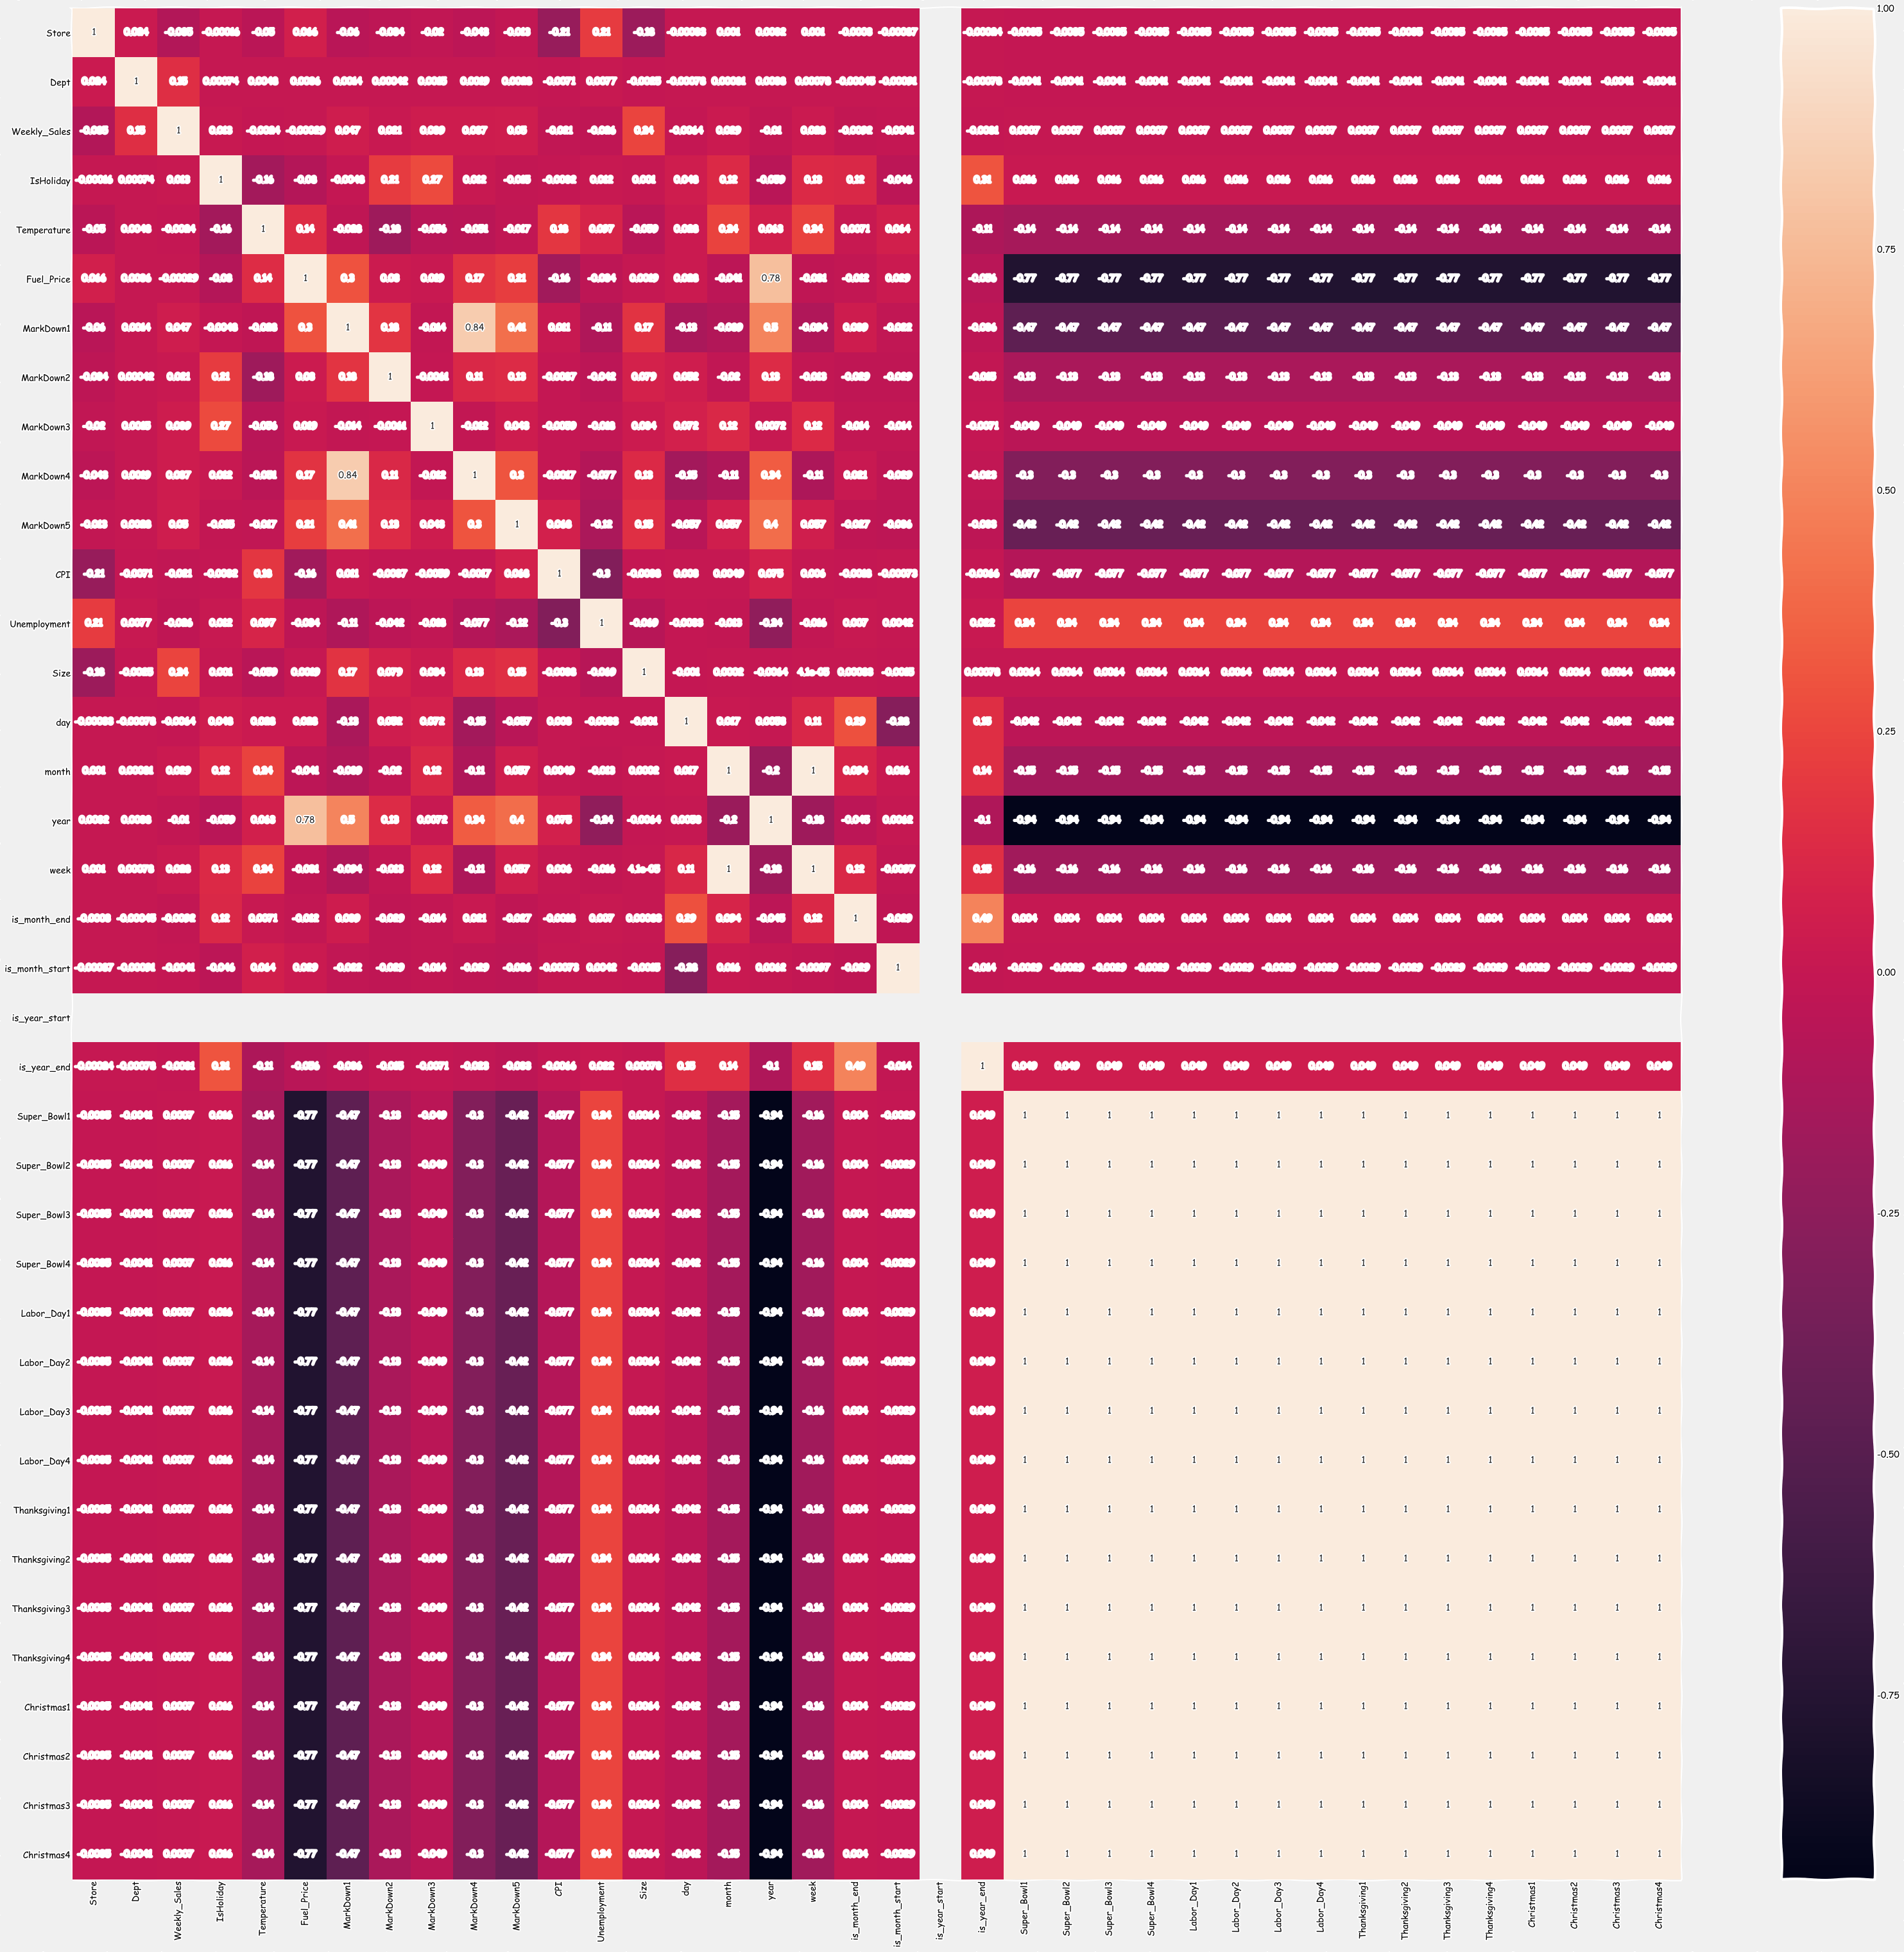

In [ ]:
# Plotting correlation between all important features
corr = walmart_df.corr()
plt.figure(figsize=(50,50))
sns.heatmap(corr, annot=True)
plt.plot()

MarkDown1 and MarkDown4 are highly correlated. We can safely remove one of them.

In [ ]:
#Dropping the MarkDown1 column.
walmart_df.drop(['MarkDown1'],axis=1,inplace=True)

In [ ]:
#Displaying the walmart_df dataframe.
walmart_df.head()

Store  Dept  Weekly_Sales  IsHoliday  Temperature  Fuel_Price  MarkDown2  \
0      1     1      24924.50      False        42.31       2.572        0.0   
1     35     3      14612.19      False        27.19       2.784        0.0   
2     35     4      26323.15      False        27.19       2.784        0.0   
3     35     5      36414.63      False        27.19       2.784        0.0   
4     35     6      11437.81      False        27.19       2.784        0.0   

   MarkDown3  MarkDown4  MarkDown5  ...  Labor_Day3  Labor_Day4 Thanksgiving1  \
0        0.0        0.0        0.0  ...         945        1309           294   
1        0.0        0.0        0.0  ...         945        1309           294   
2        0.0        0.0        0.0  ...         945        1309           294   
3        0.0        0.0        0.0  ...         945        1309           294   
4        0.0        0.0        0.0  ...         945        1309           294   

   Thanksgiving2  Thanksgiving3  Thanksgiving4  Christmas1  Christmas2  \
0            658           1022           1423         329         693   
1            658           1022           1423         329         693   
2            658           1022           1423         329         693   
3            658           1022           1423         329         693   
4            658           1022           1423         329         693   

   Christmas3  Christmas4  
0        1057        1421  
1        1057        1421  
2        1057        1421  
3        1057        1421  
4        1057        1421  

[5 rows x 38 columns]

In [ ]:
temp=walmart_df.copy(deep=True)

In [ ]:
#Transforming the categorical variables to one-hot vector using get_dummies method from pandas library.
categories = ['Store','Dept','Type','year','month','day','week','IsHoliday']

#For each categories
for i in categories:
    #Transforming to one-hot vector
    dummy = pd.get_dummies(walmart_df[i])
    #Concatenating the one-hot vector with the existing dataframe
    walmart_df = pd.concat([walmart_df,dummy],axis=1)
    #Dropping the categorical variable from the existing dataframe.
    walmart_df.drop(i,axis=1,inplace=True)

In [ ]:
#Displaying the shape of the dataframe
print("Shape of the dataframe ",walmart_df.shape)

Shape of the dataframe  (418727, 259)


In [ ]:
#Displaying the walmart_df dataframe
walmart_df.head(5)

Weekly_Sales  Temperature  Fuel_Price  MarkDown2  MarkDown3  MarkDown4  \
0      24924.50        42.31       2.572        0.0        0.0        0.0   
1      14612.19        27.19       2.784        0.0        0.0        0.0   
2      26323.15        27.19       2.784        0.0        0.0        0.0   
3      36414.63        27.19       2.784        0.0        0.0        0.0   
4      11437.81        27.19       2.784        0.0        0.0        0.0   

   MarkDown5         CPI  Unemployment    Size  ...  45  46  47  48  49  50  \
0        0.0  211.096358         8.106  151315  ...   0   0   0   0   0   0   
1        0.0  135.352461         9.262  103681  ...   0   0   0   0   0   0   
2        0.0  135.352461         9.262  103681  ...   0   0   0   0   0   0   
3        0.0  135.352461         9.262  103681  ...   0   0   0   0   0   0   
4        0.0  135.352461         9.262  103681  ...   0   0   0   0   0   0   

   51  52  False  True  
0   0   0      1     0  
1   0   0      1     0  
2   0   0      1     0  
3   0   0      1     0  
4   0   0      1     0  

[5 rows x 259 columns]

In [ ]:
#Storing the dependent variable in Y
Y = walmart_df['Weekly_Sales']
walmart_df.drop('Weekly_Sales',axis=1,inplace=True)

In [ ]:
#Due to the time series nature, we are splitting or dataset sequentially.
# Train/Test : 0.8:0.2
split_percent = int((len(walmart_df))*(0.8))
walmart_train = walmart_df[:split_percent]
y_train = Y[:split_percent]

walmart_test = walmart_df[split_percent:]
y_test = Y[split_percent:]

In [ ]:
#Displaying the shape of the train and test dataframe.
print("Train ",walmart_train.shape)
print("Test ",walmart_test.shape)

Train  (334981, 258)
Test  (83746, 258)


In [ ]:
#Displaying the walmart_train dataframe
walmart_train.head()

Temperature  Fuel_Price  MarkDown2  MarkDown3  MarkDown4  MarkDown5  \
0        42.31       2.572        0.0        0.0        0.0        0.0   
1        27.19       2.784        0.0        0.0        0.0        0.0   
2        27.19       2.784        0.0        0.0        0.0        0.0   
3        27.19       2.784        0.0        0.0        0.0        0.0   
4        27.19       2.784        0.0        0.0        0.0        0.0   

          CPI  Unemployment    Size  is_month_end  ...  45  46  47  48  49  \
0  211.096358         8.106  151315         False  ...   0   0   0   0   0   
1  135.352461         9.262  103681         False  ...   0   0   0   0   0   
2  135.352461         9.262  103681         False  ...   0   0   0   0   0   
3  135.352461         9.262  103681         False  ...   0   0   0   0   0   
4  135.352461         9.262  103681         False  ...   0   0   0   0   0   

   50  51  52  False  True  
0   0   0   0      1     0  
1   0   0   0      1     0  
2   0   0   0      1     0  
3   0   0   0      1     0  
4   0   0   0      1     0  

[5 rows x 258 columns]

<h1><b>Random Forest Regression</b></h1>

<h2><b>Hyperparameter Tuning using Random Search with Cross-Validation</b></h2>

In [ ]:
#This routine creates a dataframe from the results of the hyperparameter tuning
def visualize(random_object):
    dictionary = random_object.cv_results_
    names=['param_max_depth', 'param_min_samples_split','param_n_estimators','params']
    for i in names:
        dictionary.pop(i)
    return pd.DataFrame(dictionary)

In [ ]:
#Importing the RandomizedSearchCV from the sklearn module
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 3)]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 100, num = 3)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split}
#Printing the random_grid
print(random_grid)

{'n_estimators': [200, 600, 1000], 'max_depth': [10, 55, 100], 'min_samples_split': [2, 5]}


In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 2, verbose= 2, random_state= 42, n_jobs = -2)
# Fit the random search model
rf_random.fit(walmart_train,y_train)

Fitting 2 folds for each of 10 candidates, totalling 20 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 out of  20 | elapsed: 561.4min finished


RandomizedSearchCV(cv=2, estimator=RandomForestRegressor(), n_jobs=-2,
                   param_distributions={'max_depth': [10, 55, 100],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [200, 600, 1000]},
                   random_state=42, verbose=2)

In [ ]:
#Calling the visualize routine
visualize(rf_random)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0     463.615570      7.767369         3.385518        0.000140   
1    1397.198465     13.218450         7.336641        0.014586   
2   11567.731402     12.071814       241.687249       70.197851   
3    2508.961216     79.768038        12.513275        1.024813   
4     512.940734      3.935166         3.755645        0.067344   
5    8977.564631    363.227189       188.581368        3.609731   
6    7844.428837    429.723779        72.979426        4.961231   
7    2497.389977     58.521830        20.889281        0.071659   
8    9707.936241    190.427334        54.946401        1.803163   
9    2275.710060     71.761642        10.636450        0.039049   

   split0_test_score  split1_test_score  mean_test_score  std_test_score  \
0           0.648248           0.696437         0.672343        0.024095   
1           0.648162           0.697109         0.672635        0.024473   
2           0.891476           0.942970         0.917223        0.025747   
3           0.648553           0.697027         0.672790        0.024237   
4           0.647958           0.697140         0.672549        0.024591   
5           0.894023           0.944804         0.919413        0.025390   
6           0.893697           0.944129         0.918913        0.025216   
7           0.893439           0.943997         0.918718        0.025279   
8           0.891575           0.942266         0.916921        0.025346   
9           0.648927           0.696986         0.672957        0.024029   

   rank_test_score  
0               10  
1                8  
2                4  
3                7  
4                9  
5                1  
6                2  
7                3  
8                5  
9                6

In [ ]:
#Printing the best parameters
print("The best parameters are ",rf_random.best_params_)

The best parameters are  {'n_estimators': 600, 'min_samples_split': 2, 'max_depth': 100}


In [ ]:
#Printing the best estimator.
print('The best estimator ',rf_random.best_estimator_)

The best estimator  RandomForestRegressor(max_depth=100, n_estimators=600)


In [ ]:
#Printing the best estimator and fitting on the train data
# best_estimator=rf_random.best_estimator_
from sklearn.ensemble import RandomForestRegressor
best_estimator = RandomForestRegressor(n_estimators=600,min_samples_split=2,max_depth=100,n_jobs=-1)
best_estimator.fit(walmart_train,y_train)

RandomForestRegressor(max_depth=100, n_estimators=600, n_jobs=-1)

In [ ]:
#Saving the estimator using the dump method from joblib
joblib.dump(best_estimator, "./best_estimator_rf1.joblib")

['./best_estimator_rf1.joblib']

In [ ]:
#Loading the saved estimator from the drive.
best_estimator = joblib.load("./best_estimator_rf1.joblib")

In [ ]:
#Splitting the dataframe
temp_train = temp[:split_percent]
temp_test = temp[split_percent:]

In [ ]:
#This routine calculates the custom metric given in the Kaggle website
def custom_metric(x,x1,y,estimator):
    a=np.ones(shape=(x.shape[0]))
    a=a*(x['IsHoliday']==True)*4+1 #Gives a weight of 5 if holiday and 1 if not
    y_hat = estimator.predict(x1)
    #Calculating the weighted mean absolute de
    diff = np.abs(y-y_hat)
    diff = diff*a
    diff = np.sum(diff)
    normalize = 1/(np.sum(a))
    diff = diff*normalize
    return diff

In [ ]:
#Printing the score on the train set
print("The score on the train set ",custom_metric(temp_train,walmart_train,y_train,best_estimator))

The score on the train set  571.8164583938577


In [ ]:
#Printing the score on the test set
print("The score on the test set ",custom_metric(temp_test,walmart_test,y_test,best_estimator))

The score on the test set  2072.5841575361037


In [ ]:
#Reading the test.csv
test = pd.read_csv('test.csv')
test.head()

Store  Dept        Date  IsHoliday
0      1     1  2012-11-02      False
1      1     1  2012-11-09      False
2      1     1  2012-11-16      False
3      1     1  2012-11-23       True
4      1     1  2012-11-30      False

In [ ]:
#Preprocessing the test dataframe
test['Date'] = pd.to_datetime(test['Date'])

data=pd.merge(test,features,how='inner',on=['Store','Date','IsHoliday'])
test_df=pd.merge(data,stores,how='inner',on=['Store'])

#We are splitting the date attribute into several entities which are stored in the attributes list.
attributes = ['day','month','year','week','is_month_end','is_month_start','is_year_start','is_year_end']
for i in attributes:
    #Extracting the features in the attributes list from the Date attribute.
    test_df[i]=list(map(lambda x:getattr(x,i),test_df['Date']))

In [ ]:
#Printing the dataframe
test_df.head()

Store  Dept       Date  IsHoliday  Temperature  Fuel_Price  MarkDown1  \
0      1     1 2012-11-02      False        55.32       3.386    6766.44   
1      1     2 2012-11-02      False        55.32       3.386    6766.44   
2      1     3 2012-11-02      False        55.32       3.386    6766.44   
3      1     4 2012-11-02      False        55.32       3.386    6766.44   
4      1     5 2012-11-02      False        55.32       3.386    6766.44   

   MarkDown2  MarkDown3  MarkDown4  ...  Type    Size  day month  year  week  \
0     5147.7      50.82     3639.9  ...     A  151315    2    11  2012    44   
1     5147.7      50.82     3639.9  ...     A  151315    2    11  2012    44   
2     5147.7      50.82     3639.9  ...     A  151315    2    11  2012    44   
3     5147.7      50.82     3639.9  ...     A  151315    2    11  2012    44   
4     5147.7      50.82     3639.9  ...     A  151315    2    11  2012    44   

   is_month_end  is_month_start  is_year_start  is_year_end  
0         False           False          False        False  
1         False           False          False        False  
2         False           False          False        False  
3         False           False          False        False  
4         False           False          False        False  

[5 rows x 23 columns]

In [ ]:
#Routine to calculate the number of days to any of the four markdown events from the current date.
def return_date_features(names,dates):
    #For each events
    for i in range(len(names)):
        #Calculating the difference in the days
        test_df[names[i]] = pd.to_datetime(dates[i])-test_df['Date']
        #Extracting the day value from the timestamp object.
        test_df[names[i]] = list(map(lambda x:x.days,test_df[names[i]]))


#These data are given in the Kaggle Competition website.
names=['Super_Bowl{0}'.format(i) for i in range(1,5)]
dates=['2010-02-12','2011-02-11','2012-02-10','2013-02-08']
names.extend(['Labor_Day{0}'.format(i) for i in range(1,5)])
dates.extend(['2010-09-10','2011-09-09','2012-09-07','2013-09-06'])
names.extend(['Thanksgiving{0}'.format(i) for i in range(1,5)])
dates.extend(['2010-11-26','2011-11-25','2012-11-23','2013-12-29'])
names.extend(['Christmas{0}'.format(i) for i in range(1,5)])
dates.extend(['2010-12-31','2011-12-30','2012-12-28','2013-12-27'])
#Calling the function.
return_date_features(names,dates)

In [ ]:
#Dropping the date attribute from the test_df dataframe.
test_df.drop(['Date'],axis=1,inplace=True)

In [ ]:
#Printing the columns
print(test_df.columns)

Index(['Store', 'Dept', 'IsHoliday', 'Temperature', 'Fuel_Price', 'MarkDown1',
       'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI',
       'Unemployment', 'Type', 'Size', 'day', 'month', 'year', 'week',
       'is_month_end', 'is_month_start', 'is_year_start', 'is_year_end',
       'Super_Bowl1', 'Super_Bowl2', 'Super_Bowl3', 'Super_Bowl4',
       'Labor_Day1', 'Labor_Day2', 'Labor_Day3', 'Labor_Day4', 'Thanksgiving1',
       'Thanksgiving2', 'Thanksgiving3', 'Thanksgiving4', 'Christmas1',
       'Christmas2', 'Christmas3', 'Christmas4'],
      dtype='object')


In [ ]:
#Dropping the MarkDown1 column.
test_df.drop(['MarkDown1'],axis=1,inplace=True)

In [ ]:
#Copying the test dataframe
temp=test_df.copy(deep=True)

In [ ]:
#Transforming the categorical variables to one-hot vector using get_dummies method from pandas library.
categories = ['Store','Dept','Type','year','month','day','week','IsHoliday']

#For each categories
for i in categories:
    #Transforming to one-hot vector
    dummy = pd.get_dummies(np.unique(temp[i]))
    #Concatenating the one-hot vector with the existing dataframe
    test_df = pd.concat([test_df,dummy],axis=1)
    #Dropping the categorical variable from the existing dataframe.
    test_df.drop(i,axis=1,inplace=True)

In [ ]:
#Displaying the shape of the dataframe
print("Shape of the dataframe ",test_df.shape)

Shape of the dataframe  (115064, 258)


In [ ]:
#Printing the test dataframe
test_df.head()

Temperature  Fuel_Price  MarkDown2  MarkDown3  MarkDown4  MarkDown5  \
0        55.32       3.386     5147.7      50.82     3639.9    2737.42   
1        55.32       3.386     5147.7      50.82     3639.9    2737.42   
2        55.32       3.386     5147.7      50.82     3639.9    2737.42   
3        55.32       3.386     5147.7      50.82     3639.9    2737.42   
4        55.32       3.386     5147.7      50.82     3639.9    2737.42   

          CPI  Unemployment    Size  is_month_end  ...   45   46   47   48  \
0  223.462779         6.573  151315         False  ...  0.0  0.0  0.0  0.0   
1  223.462779         6.573  151315         False  ...  0.0  0.0  0.0  0.0   
2  223.462779         6.573  151315         False  ...  0.0  0.0  0.0  0.0   
3  223.462779         6.573  151315         False  ...  0.0  0.0  0.0  0.0   
4  223.462779         6.573  151315         False  ...  0.0  0.0  0.0  0.0   

    49   50   51   52  False  True  
0  0.0  0.0  0.0  0.0    1.0   0.0  
1  0.0  0.0  0.0  0.0    0.0   1.0  
2  0.0  0.0  0.0  0.0    NaN   NaN  
3  0.0  0.0  0.0  0.0    NaN   NaN  
4  0.0  0.0  0.0  0.0    NaN   NaN  

[5 rows x 258 columns]

In [ ]:
#Creating a list to store the names of the attributes for which we need to perform analysis
attributes = ['MarkDown2','MarkDown3','MarkDown4','MarkDown5']
for i in attributes:
    #Counting the number of records with negative values in it.
    count = (getattr(test_df,i)<0).sum()
    #Finding the proportion
    proportion = count/len(test_df)
    #Printing the percentage of records with negative values in it.
    print("Percentage of records with negative values in the {0} attribute ".format(i),proportion*100)

Percentage of records with negative values in the MarkDown2 attribute  0.358061600500591
Percentage of records with negative values in the MarkDown3 attribute  0.5118890356671071
Percentage of records with negative values in the MarkDown4 attribute  0.0
Percentage of records with negative values in the MarkDown5 attribute  0.11819509142737955


In [ ]:
#Filling the NaN values
test_df['MarkDown2'] = test_df['MarkDown2'].fillna(0)
test_df['MarkDown3'] = test_df['MarkDown3'].fillna(0)
test_df['MarkDown4'] = test_df['MarkDown4'].fillna(0)
test_df['MarkDown5'] = test_df['MarkDown5'].fillna(0)

In [ ]:
#Filling the NaN values for CPI
test_df = test_df.fillna(0)

In [ ]:
#Prediction
y_hat_test = best_estimator.predict(test_df)

In [ ]:
#Reading the submission.csv
submission=pd.read_csv('ss.csv')

In [ ]:
#Printing the dataframe
submission.head()

Id  Weekly_Sales
0  1_1_2012-11-02             0
1  1_1_2012-11-09             0
2  1_1_2012-11-16             0
3  1_1_2012-11-23             0
4  1_1_2012-11-30             0

In [ ]:
#Concatenating the columns
test['Id'] = test['Store'].astype(str)+'_'+test['Dept'].astype(str)+'_'+test['Date']

In [ ]:
#Adding the dependent variable
test['Weekly_Sales'] = y_hat_test

In [ ]:
#Dropping the unnecessary columns
test.drop(['Store','Dept','Date','IsHoliday'],axis=1,inplace=True)

In [ ]:
#Writing the csv file
test.to_csv('submission(1).csv',columns=['Id','Weekly_Sales'])

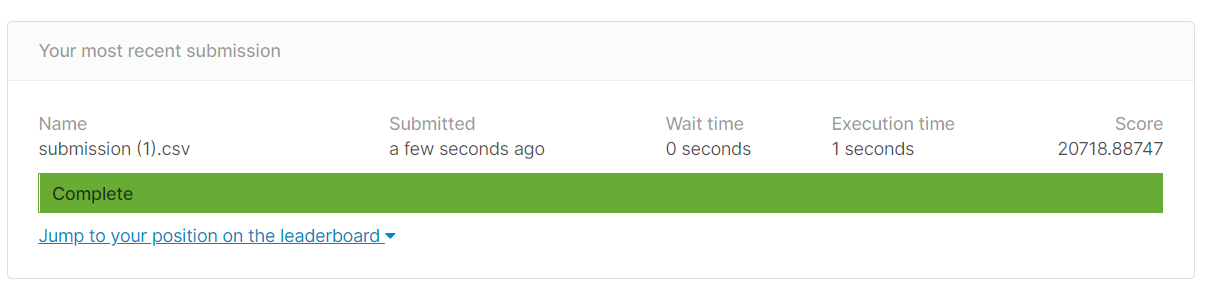